<summary>Table of Contents</summary>

- [1. Comparison of models](#1-comparison-of-models)
- [2. Self-supervised](#2-self-supervised)
- [3. Ablation study](#3-ablation-study)
- [4. TimeLLM](#4-timellm)
- [5. Decomposition](#5-decomposition)

This script summarizes results from all experiments and represents them in plots.

In [26]:
import pandas as pd
from utils.helper import style_dataframe
from utils.plot_final_results import plot_results_models_multiple_countries

# 1. Comparison of models

In [27]:
countries = ['DE', 'ES', 'FR', 'GB', 'IT']
naive_df = pd.read_csv('results/naive/metrics_persistence_countries_minmax.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('Persistence', ['RMSE', 'MAE'])]
arima_df = pd.read_csv('results/arima/metrics_arima_countries_minmax.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('(S)ARIMA', ['RMSE', 'MAE'])]
informer_df = pd.read_csv('results/informer/informer.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('Informer', ['RMSE', 'MAE'])]
patchtst_df = pd.read_csv('results/patchtst/patchtst_128.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('PatchTST/42', ['RMSE', 'MAE'])]
patchtst_64_df = pd.read_csv('results/patchtst/patchtst_bs128_pl512.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('PatchTST/64', ['RMSE', 'MAE'])]

all_df = pd.concat([naive_df, arima_df, informer_df, patchtst_df], axis=1)

# Highlight the minimum values in bold
styled_df = style_dataframe(all_df)
styled_df

Create plots.

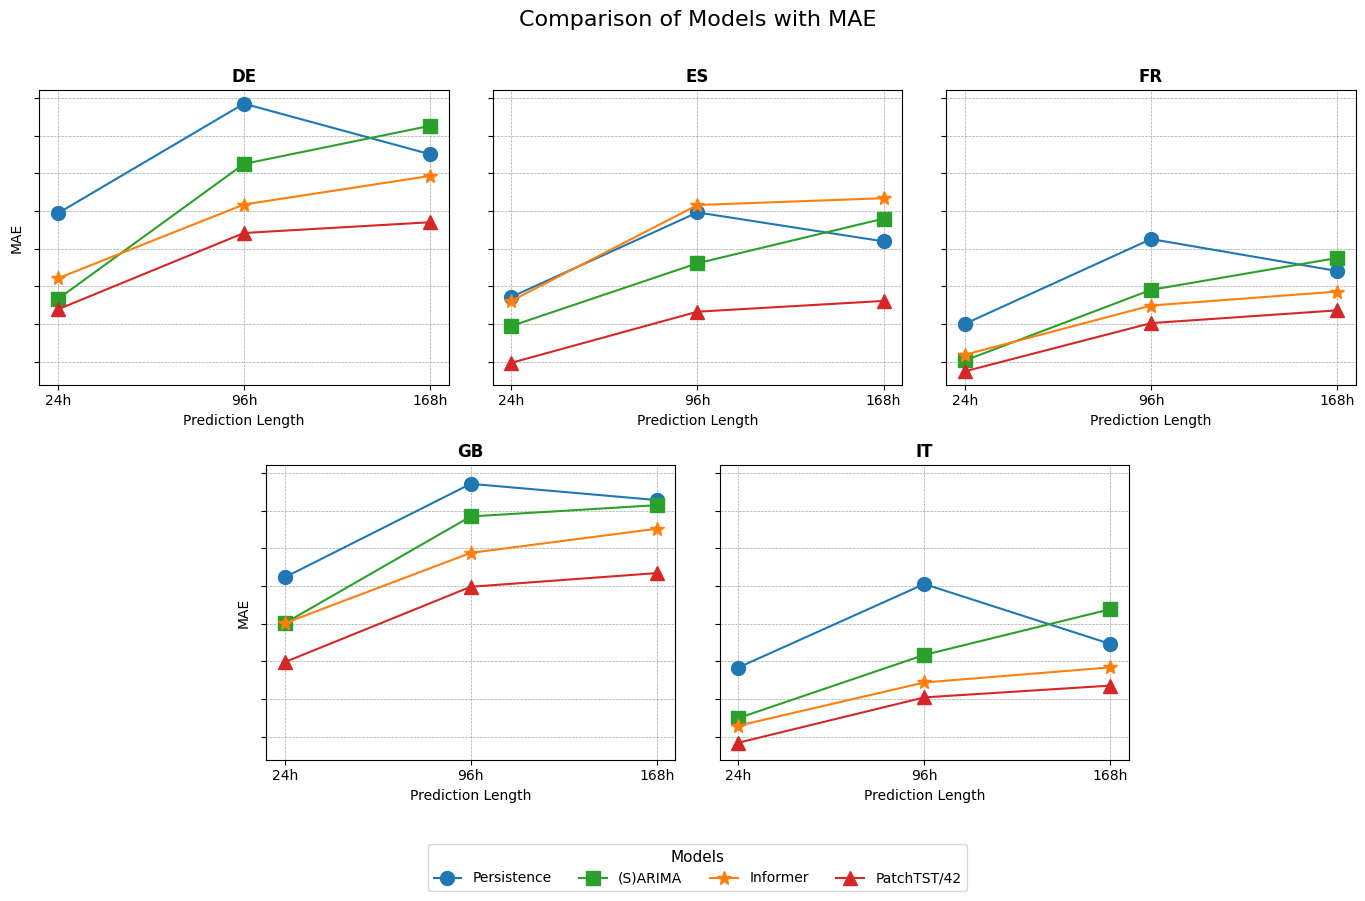

In [28]:
plot_results_models_multiple_countries(all_df, 
                                       function="lines", 
                                       countries=countries, 
                                       eval_metric='MAE')

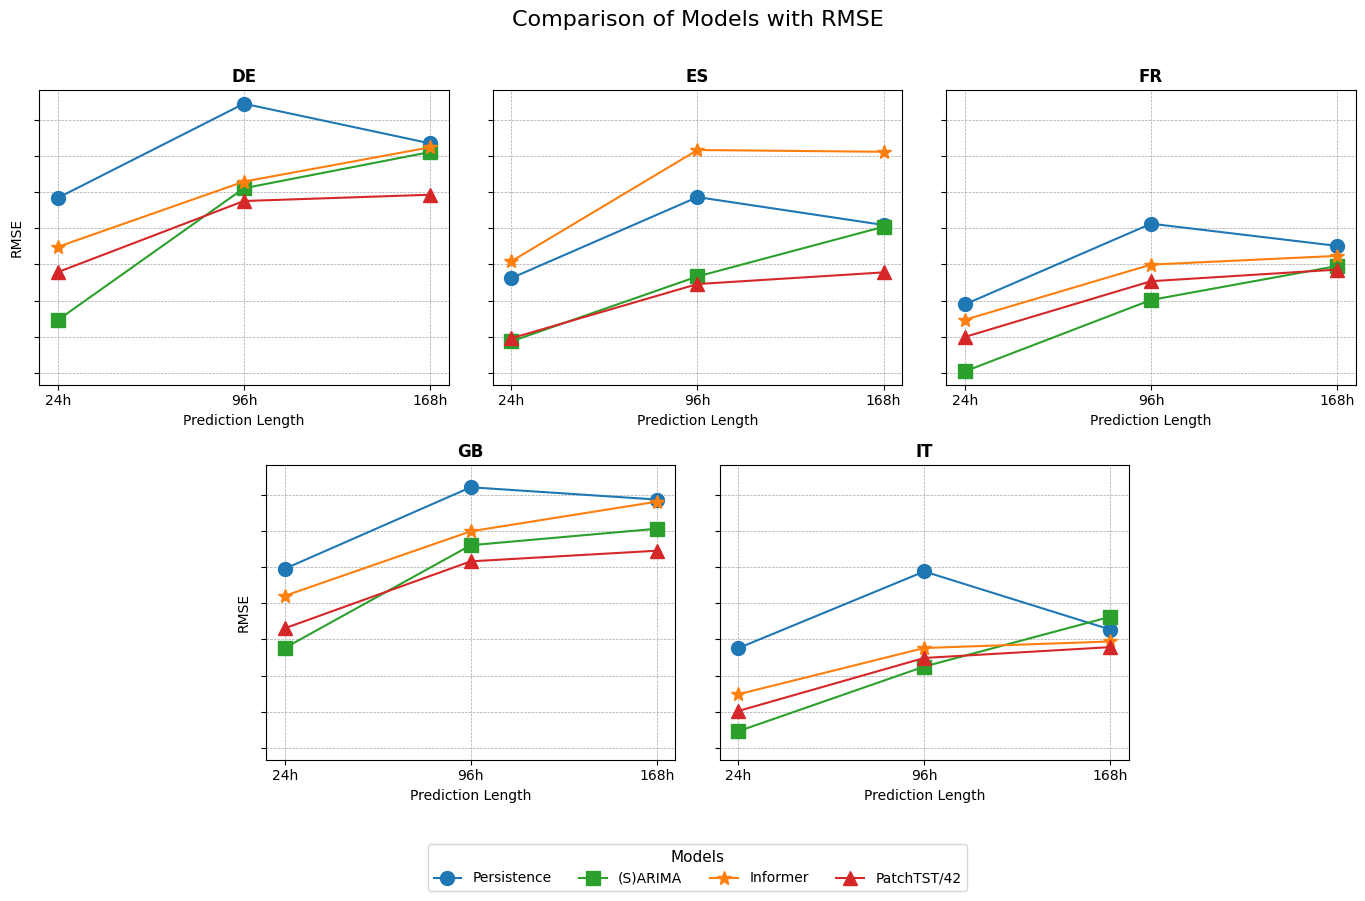

In [29]:
plot_results_models_multiple_countries(all_df, 
                                       function="lines", 
                                       countries=countries, 
                                       eval_metric='RMSE')

# 2. Self-supervised

In [30]:
self_supervised = pd.read_csv('results/patchtst/finetune_results.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('Self-supervised', ['RMSE', 'MAE'])]
all_df_2 = pd.concat([patchtst_df, patchtst_64_df, self_supervised], axis=1).round(4)

styled_df_2 = style_dataframe(all_df_2)
styled_df_2

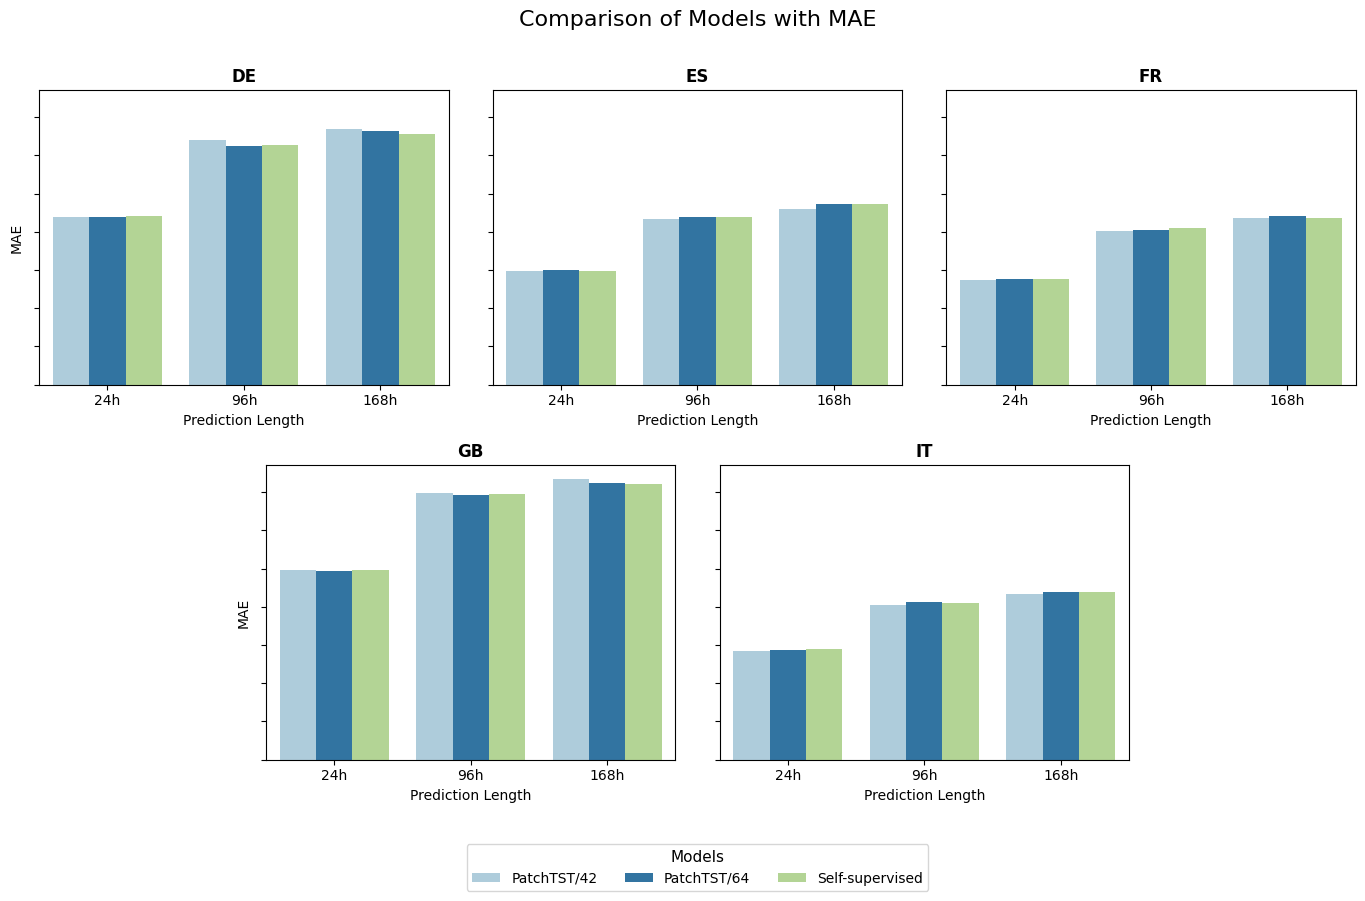

In [31]:
plot_results_models_multiple_countries(all_df_2, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='MAE',
                                       palette="Paired") 
# whether my eyes do not work anymore, or all these palettes are terrible

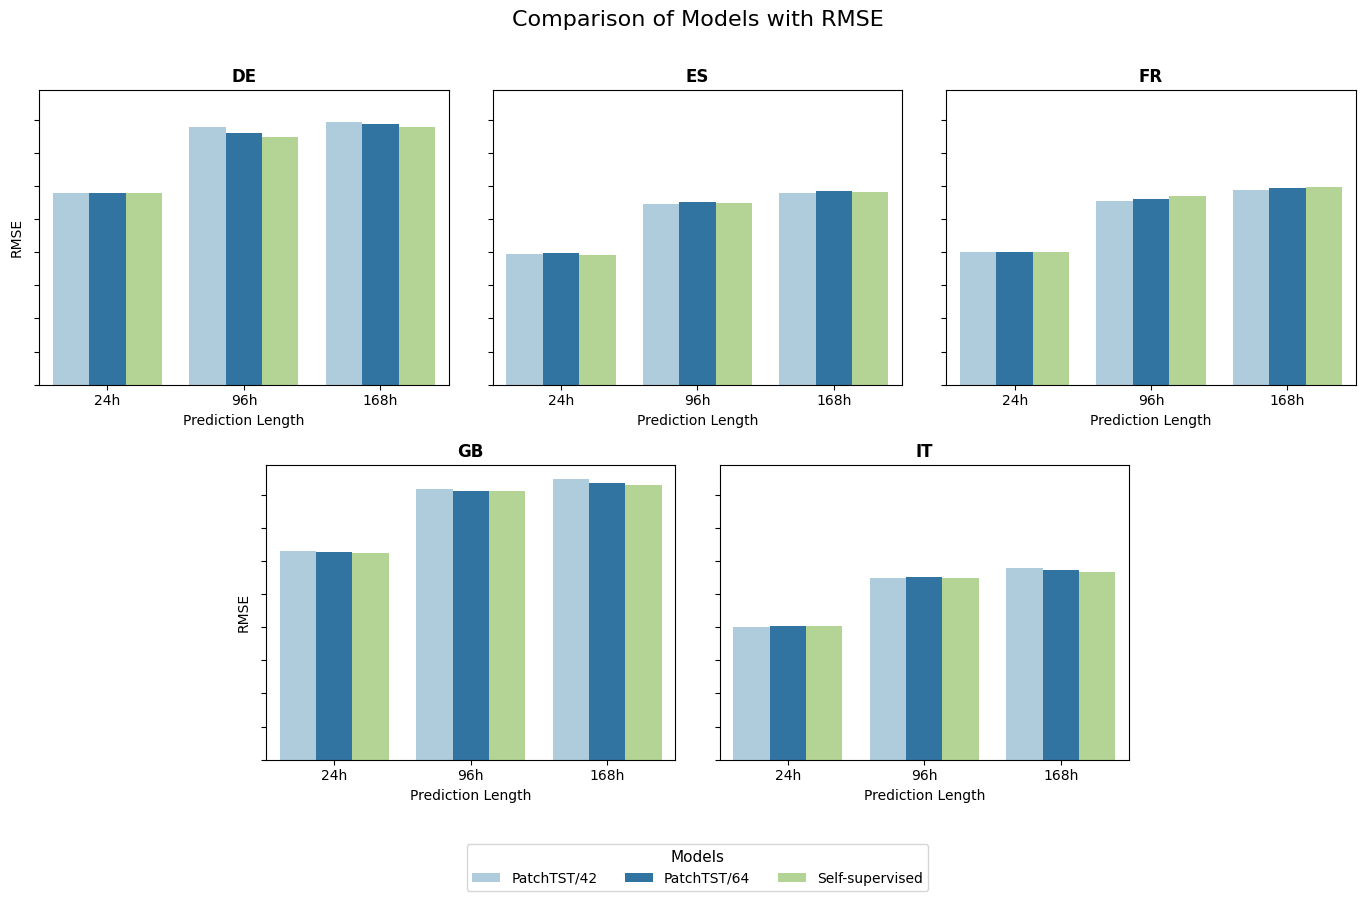

In [32]:
plot_results_models_multiple_countries(all_df_2, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='RMSE',
                                       palette="Paired")

# 3. Ablation study

In [33]:
channel_mix = pd.read_csv('results/patchtst/patchtst_channel_mixing.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]
patchtst_mix_features = pd.read_csv('results/patchtst/patchtst_channel_mixing_MIX_FEATURES.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]

all_df_3 = pd.concat([channel_mix,patchtst_mix_features], axis=1).round(4)

# Highlight the minimum values in bold
#styled_df_3 = style_dataframe(all_df_3, 'max')
#styled_df_3
all_df_3

Model                 CM                        
Metrics             RMSE     MAE    RMSE     MAE
Country Pred_len                                
DE      24        0.1466  0.0920  0.1633  0.1058
        96        0.2045  0.1345  0.2054  0.1412
        168       0.2148  0.1428  0.2079  0.1427
ES      24        0.0997  0.0613  0.1072  0.0680
        96        0.1385  0.0908  0.1463  0.0967
        168       0.1477  0.0978  0.1577  0.1058
FR      24        0.1015  0.0569  0.1093  0.0624
        96        0.1445  0.0840  0.1513  0.0888
        168       0.1460  0.0886  0.1508  0.0918
GB      24        0.1586  0.1015  0.1692  0.1115
        96        0.2069  0.1411  0.2114  0.1466
        168       0.2237  0.1511  0.2173  0.1520
IT      24        0.1017  0.0585  0.1059  0.0630
        96        0.1351  0.0821  0.1406  0.0871
        168       0.1413  0.0880  0.1445  0.0912

In [34]:
no_revin = pd.read_csv('results/patchtst/patchtst_no_revin.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('-RevIN', ['RMSE', 'MAE'])]
channel_mix = pd.read_csv('results/patchtst/patchtst_channel_mixing.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]
patchtst_mix_features = pd.read_csv('results/patchtst/patchtst_channel_mixing_MIX_FEATURES.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('CM', ['RMSE', 'MAE'])]
no_patch = pd.read_csv('results/patchtst/patchtst_no_patching.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('-P', ['RMSE', 'MAE'])]

all_df_3 = pd.concat([patchtst_df, no_revin, patchtst_mix_features, no_patch], axis=1)

# Highlight maximum values in bold
styled_df_3 = style_dataframe(all_df_3, 'max')
styled_df_3

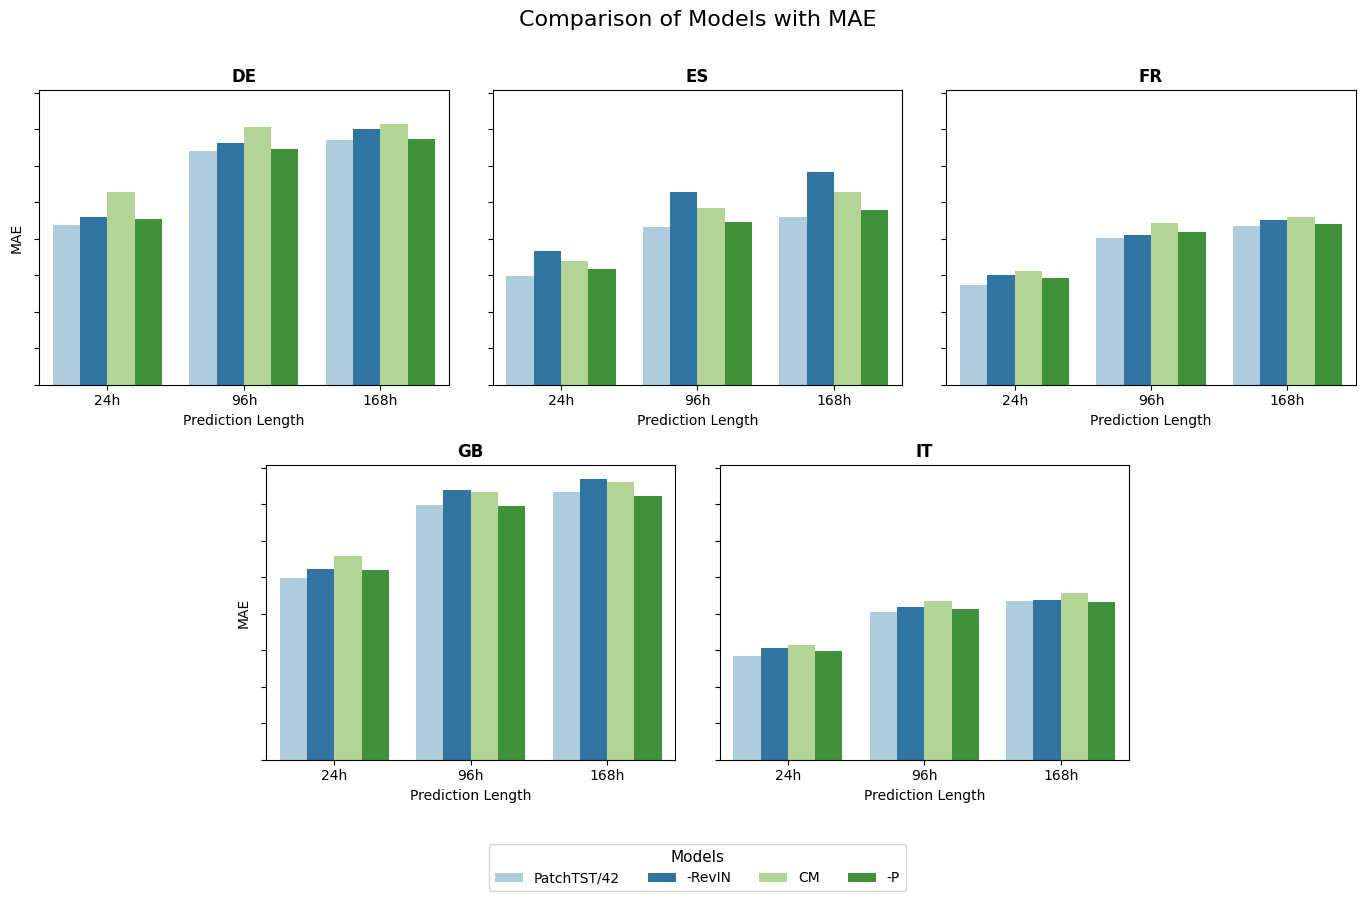

In [35]:
plot_results_models_multiple_countries(all_df_3, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='MAE',
                                       palette="Paired")

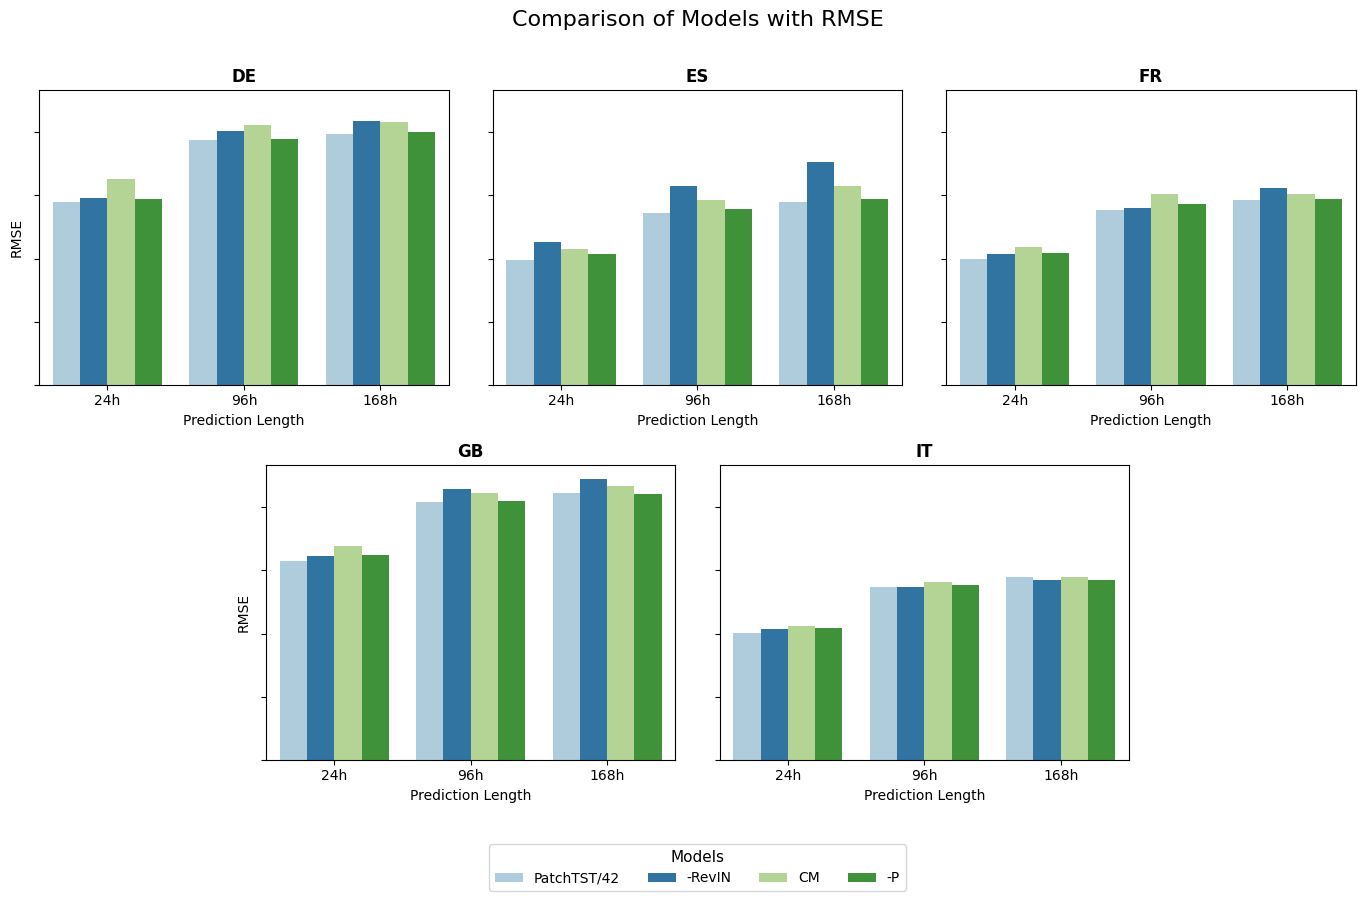

In [36]:
plot_results_models_multiple_countries(all_df_3, 
                                       function="bars", 
                                       countries=countries, 
                                       eval_metric='RMSE',
                                       palette="Paired")

In [37]:
#styled_df.to_html('styled_dataframe.html')
# display(HTML(styled_df_reset.to_html(index=True)))
#from IPython.display import display, HTML


# 4. TimeLLM

In [43]:
timellm_df = pd.read_csv('results/timellm/timellm.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('TimeLLM', ['RMSE', 'MAE'])]
all_df_4 = pd.concat([patchtst_64_df, timellm_df], axis=1)

# Highlight maximum values in bold
styled_df_4 = style_dataframe(all_df_4)
styled_df_4


# 5. Decomposition

In [40]:
decomposition_df = pd.read_csv('results/patchtst/patchtst_decomposition.csv', header=[0, 1], index_col=[0, 1]).loc[:, ('Decomposition', ['RMSE', 'MAE'])]

all_df_5 = pd.concat([patchtst_df, decomposition_df], axis=1)

styled_df_5 = style_dataframe(all_df_5)
styled_df_5